# **Exploratory Data Analysis**

In [48]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd
from scipy import sparse

import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
# convert csv to dataframe
x = pd.read_csv('/content/drive/MyDrive/Data/ProjectFinalData/train_values.csv',index_col='building_id')
y = pd.read_csv('/content/drive/MyDrive/Data/ProjectFinalData/train_labels.csv',index_col='building_id')
x_comp_test = pd.read_csv('/content/drive/MyDrive/Data/ProjectFinalData/test_values.csv',index_col='building_id')

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

from timeit import default_timer as timer

!pip install catboost
!pip install optuna

from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
print("# Train Values: {}".format(x.shape))
print("# Train Labels: {}".format(y.shape))
print("# Test Values: {}".format(x_comp_test.shape))

# Train Values: (260601, 38)
# Train Labels: (260601, 1)
# Test Values: (86868, 38)


In [53]:
x.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
28830,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,0
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
590882,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
201944,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,0


In [54]:
y.head()

,damage_grade
building_id,
802906,3
28830,2
94947,3
590882,2
201944,3


In [55]:
x_comp_test.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
300051,17,596,11307,3,20,7,6,t,r,n,...,0,0,0,0,0,0,0,0,0,0
99355,6,141,11987,2,25,13,5,t,r,n,...,1,0,0,0,0,0,0,0,0,0
890251,22,19,10044,2,5,4,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
745817,26,39,633,1,0,19,3,t,r,x,...,0,0,1,0,0,0,0,0,0,0
421793,17,289,7970,3,15,8,7,t,r,q,...,0,0,0,0,0,0,0,0,0,0


# **Class Distribution**

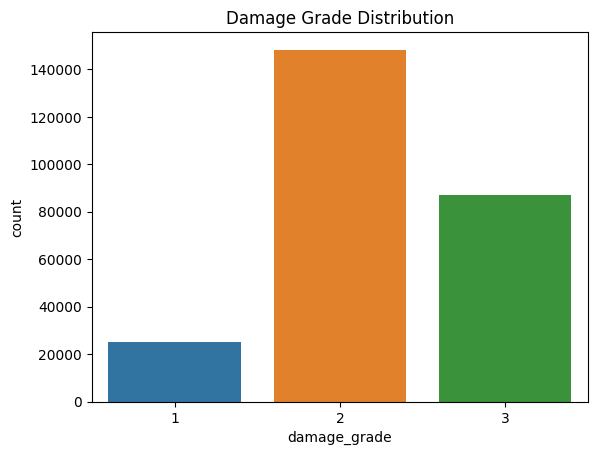

In [56]:
sns.countplot(x="damage_grade", data=y)
plt.title("Damage Grade Distribution")
plt.show()

# **Missing Value Check**

In [57]:
x.isnull().sum() * 100 / len(x)

geo_level_1_id                            0.0
geo_level_2_id                            0.0
geo_level_3_id                            0.0
count_floors_pre_eq                       0.0
age                                       0.0
area_percentage                           0.0
height_percentage                         0.0
land_surface_condition                    0.0
foundation_type                           0.0
roof_type                                 0.0
ground_floor_type                         0.0
other_floor_type                          0.0
position                                  0.0
plan_configuration                        0.0
has_superstructure_adobe_mud              0.0
has_superstructure_mud_mortar_stone       0.0
has_superstructure_stone_flag             0.0
has_superstructure_cement_mortar_stone    0.0
has_superstructure_mud_mortar_brick       0.0
has_superstructure_cement_mortar_brick    0.0
has_superstructure_timber                 0.0
has_superstructure_bamboo         

# **Type Analysis**

In [58]:
x.dtypes

geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_cement_mortar_brick     int64
has_superstructure_t

In [59]:
y.dtypes

damage_grade    int64
dtype: object

In [60]:
x_comp_test.dtypes

geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_cement_mortar_brick     int64
has_superstructure_t

# **Input Feature Distribution Analysis**

1. Number of Floors before the earthquake





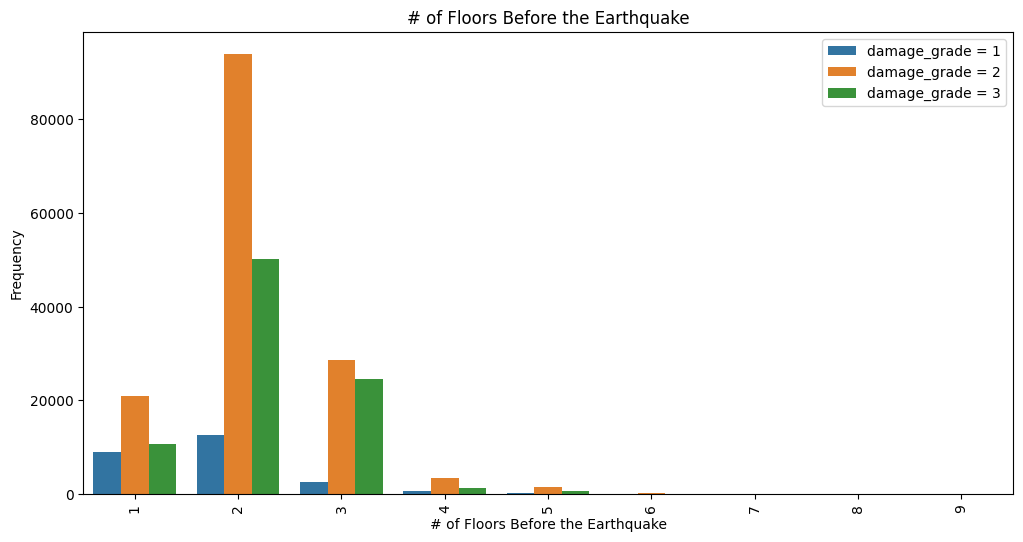

In [61]:
plt.figure(figsize=(12,6))
sns.countplot(x= x["count_floors_pre_eq"], hue=y["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("# of Floors Before the Earthquake")
plt.xticks(rotation=90)
plt.title("# of Floors Before the Earthquake")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

2. Age of building

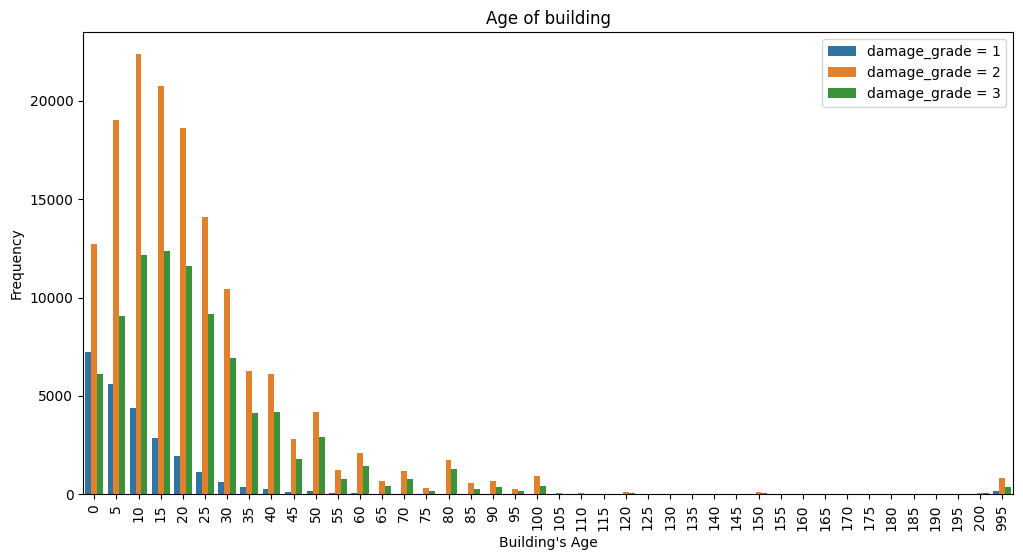

In [62]:
plt.figure(figsize=(12,6))
sns.countplot(x=x["age"],hue=y["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Building's Age")
plt.xticks(rotation=90)
plt.title("Age of building")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

3. Area Percentage

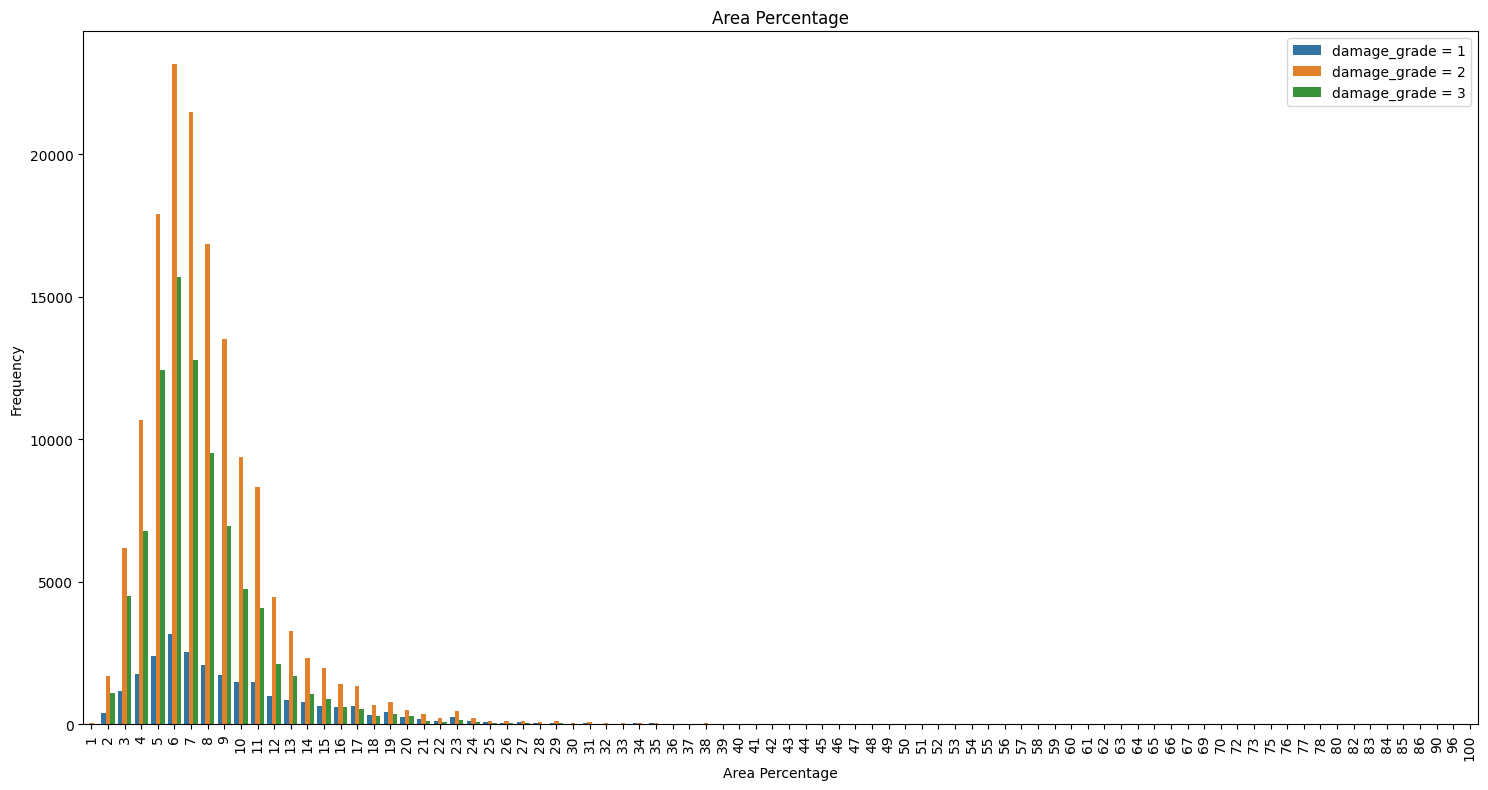

In [63]:
plt.figure(figsize=(18,9))
sns.countplot(x=x["area_percentage"],hue=y["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Area Percentage")
plt.xticks(rotation=90)
plt.title("Area Percentage")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

4. Height Percentage

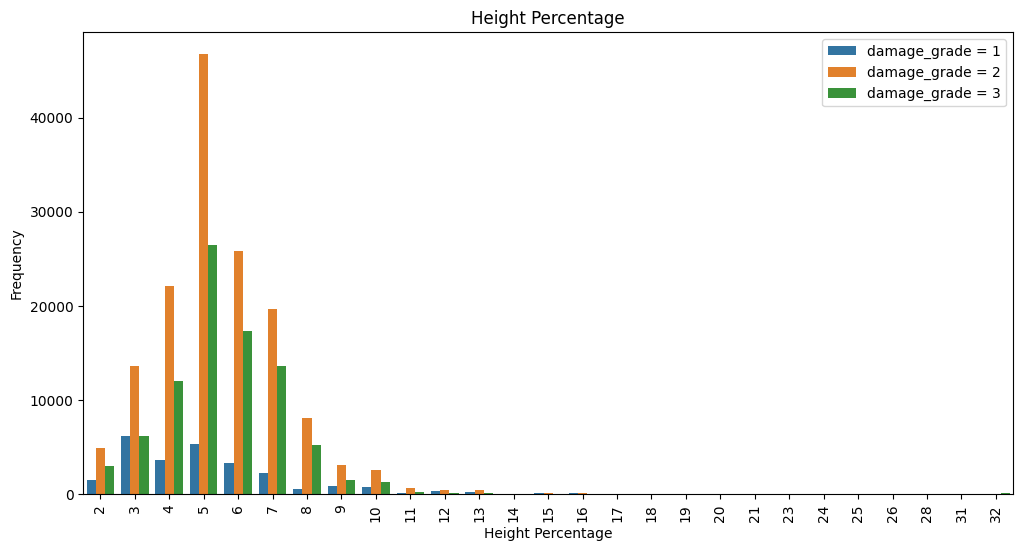

In [64]:
plt.figure(figsize=(12,6))
sns.countplot(x=x["height_percentage"],hue=y["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Height Percentage")
plt.xticks(rotation=90)
plt.title("Height Percentage")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

5. Land surface conditions

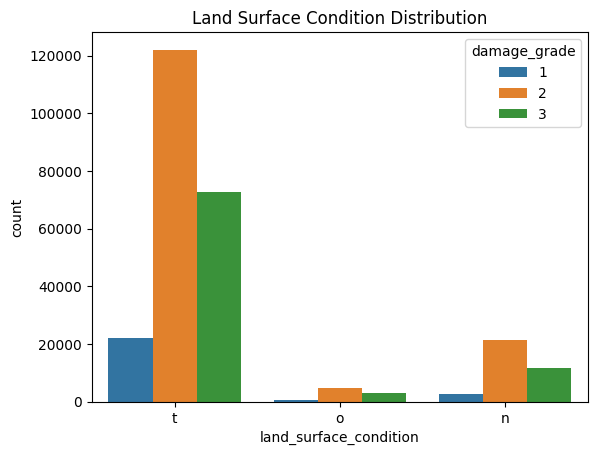

In [65]:
sns.countplot(x = x["land_surface_condition"], hue = y["damage_grade"])
plt.title("Land Surface Condition Distribution")
plt.show()

6. Foundation Type

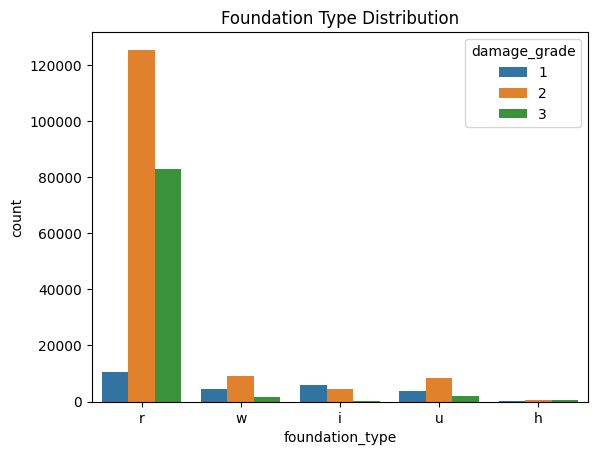

In [66]:
sns.countplot(x = x["foundation_type"], hue = y["damage_grade"])
plt.title("Foundation Type Distribution")
plt.show()

7. Roof Type

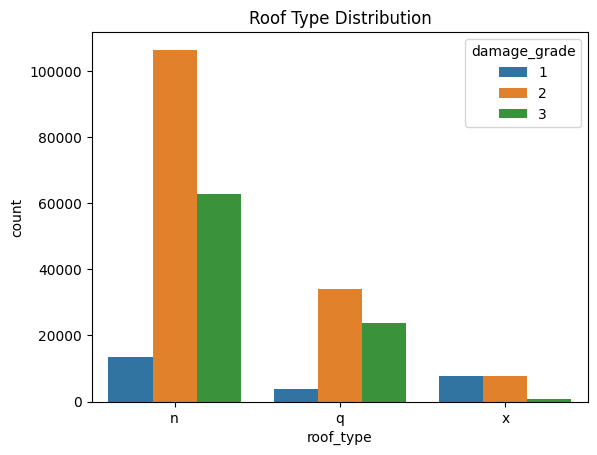

In [67]:
sns.countplot(x = x["roof_type"], hue = y["damage_grade"])
plt.title("Roof Type Distribution")
plt.show()

8. Ground Floor Type

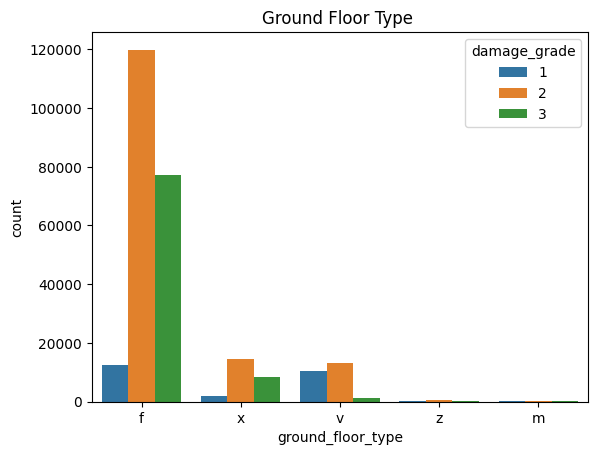

In [68]:
sns.countplot(x = x["ground_floor_type"], hue = y["damage_grade"])
plt.title("Ground Floor Type ")
plt.show()

9. Other Floor Type

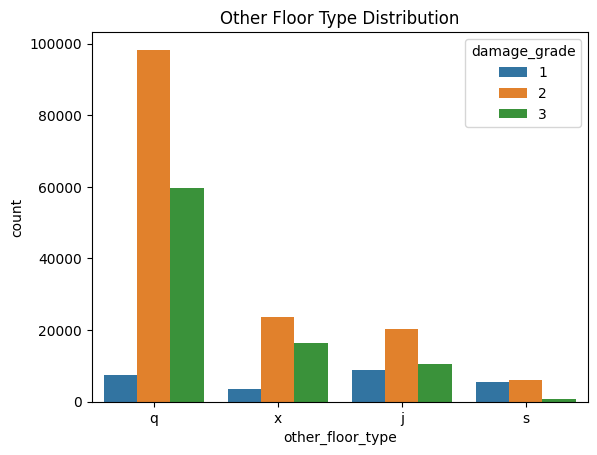

In [69]:
sns.countplot(x = x["other_floor_type"], hue = y["damage_grade"])
plt.title("Other Floor Type Distribution")
plt.show()

10. Position

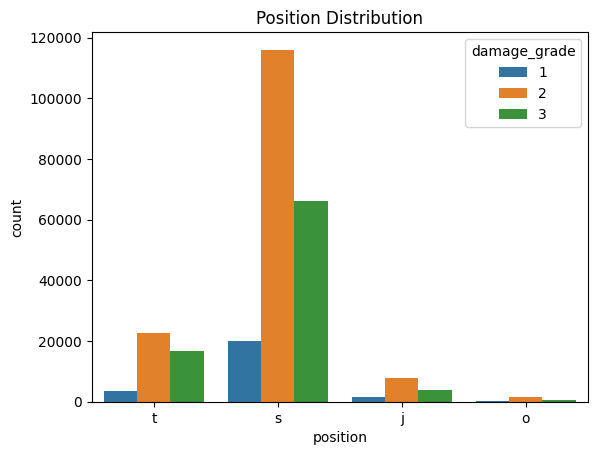

In [70]:
sns.countplot(x = x["position"], hue = y["damage_grade"])
plt.title("Position Distribution")
plt.show()

11. Plan Configuration

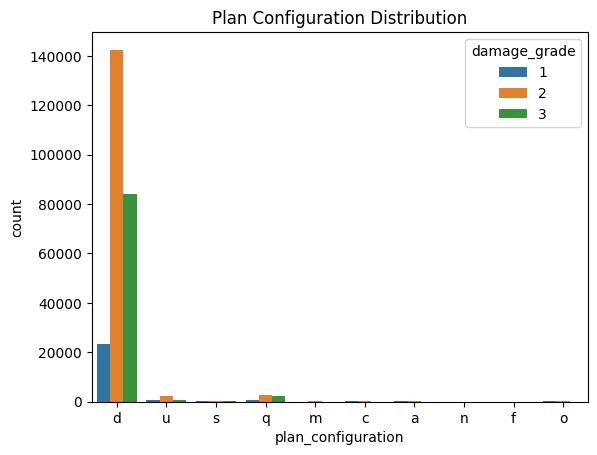

In [71]:
sns.countplot(x = x["plan_configuration"], hue = y["damage_grade"])
plt.title("Plan Configuration Distribution")
plt.show()

12. Superstructure: abode mud

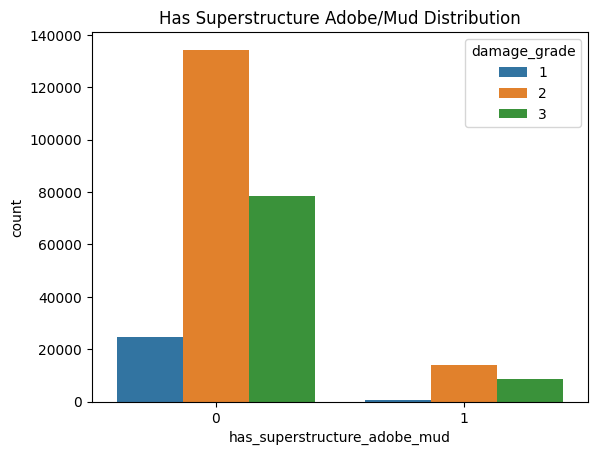

In [72]:
sns.countplot(x = x["has_superstructure_adobe_mud"], hue = y["damage_grade"])
plt.title("Has Superstructure Adobe/Mud Distribution")
plt.show()

13. Superstructure: mortal stone

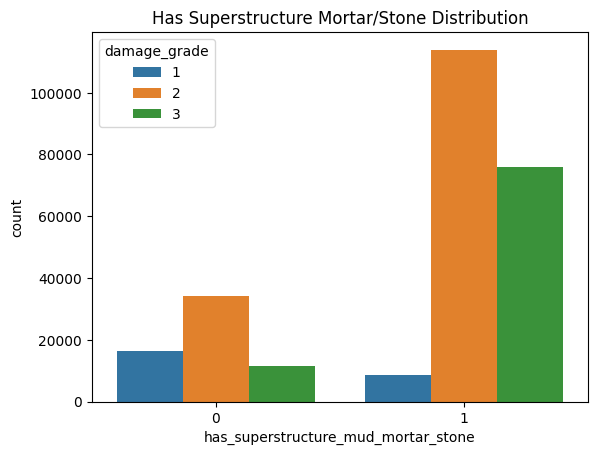

In [73]:
sns.countplot(x = x["has_superstructure_mud_mortar_stone"], hue = y["damage_grade"])
plt.title("Has Superstructure Mortar/Stone Distribution")
plt.show()

14. Super structure: mud mortar brick

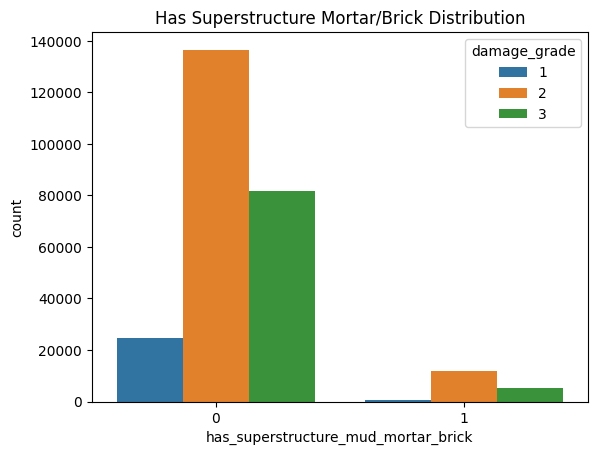

In [74]:
sns.countplot(x = x["has_superstructure_mud_mortar_brick"], hue = y["damage_grade"])
plt.title("Has Superstructure Mortar/Brick Distribution")
plt.show()

15. Super structure: cement mortar brick

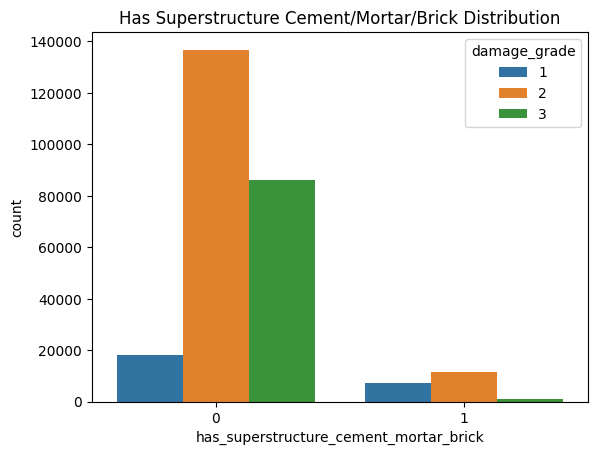

In [75]:
sns.countplot(x = x["has_superstructure_cement_mortar_brick"], hue = y["damage_grade"])
plt.title("Has Superstructure Cement/Mortar/Brick Distribution")
plt.show()

16. Super structure: timber

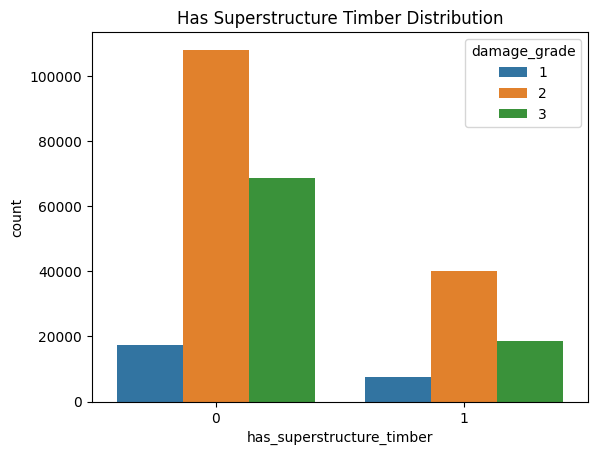

In [76]:
sns.countplot(x = x["has_superstructure_timber"], hue = y["damage_grade"])
plt.title("Has Superstructure Timber Distribution")
plt.show()

17.Super structure: Bamboo

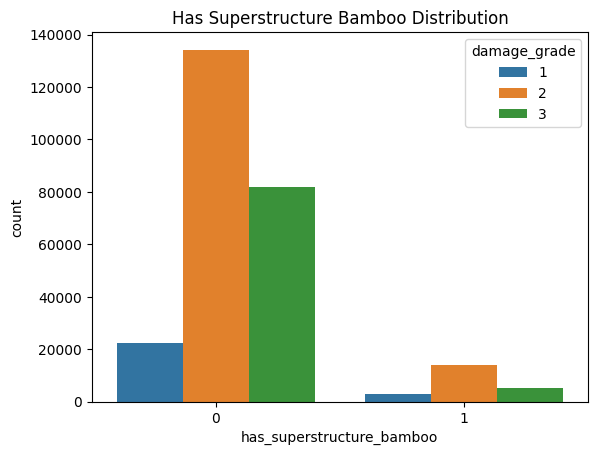

In [77]:
sns.countplot(x = x["has_superstructure_bamboo"], hue = y["damage_grade"])
plt.title("Has Superstructure Bamboo Distribution")
plt.show()

18.Super structure: rc non_engineered

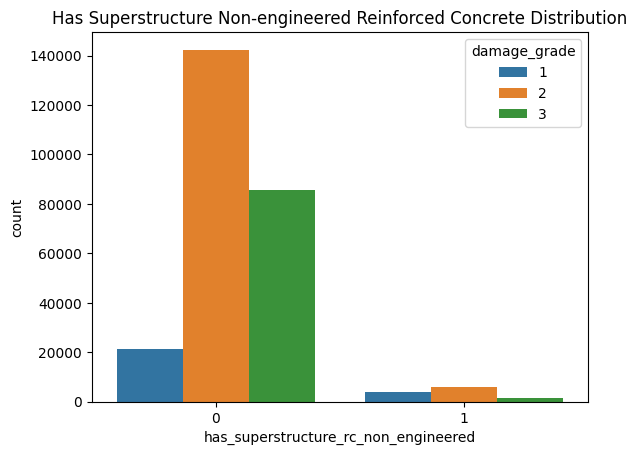

In [78]:
sns.countplot(x = x["has_superstructure_rc_non_engineered"], hue = y["damage_grade"])
plt.title("Has Superstructure Non-engineered Reinforced Concrete Distribution")
plt.show()

19. Super structure: rc_engineered

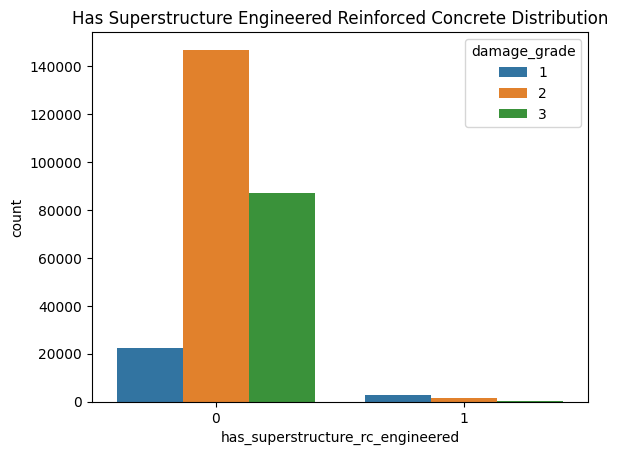

In [79]:
sns.countplot(x = x["has_superstructure_rc_engineered"], hue = y["damage_grade"])
plt.title("Has Superstructure Engineered Reinforced Concrete Distribution")
plt.show()

20.  Super structure: others

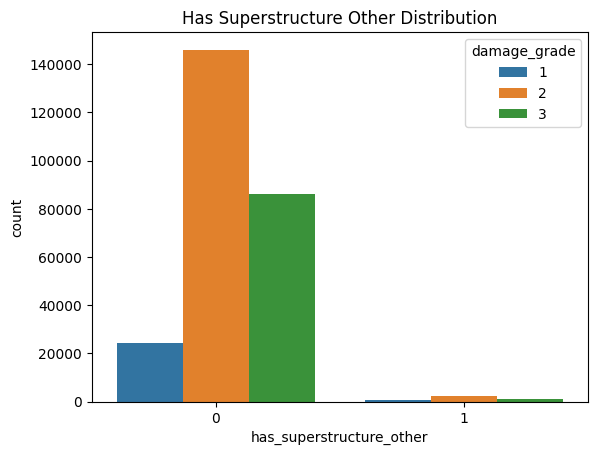

In [80]:
sns.countplot(x = x["has_superstructure_other"], hue = y["damage_grade"])
plt.title("Has Superstructure Other Distribution")
plt.show()

21. Legal ownership

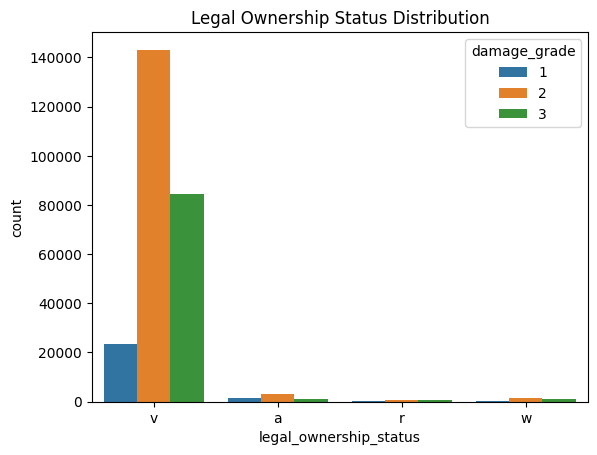

In [81]:
sns.countplot(x = x["legal_ownership_status"], hue = y["damage_grade"])
plt.title("Legal Ownership Status Distribution")
plt.show()

22. Family count

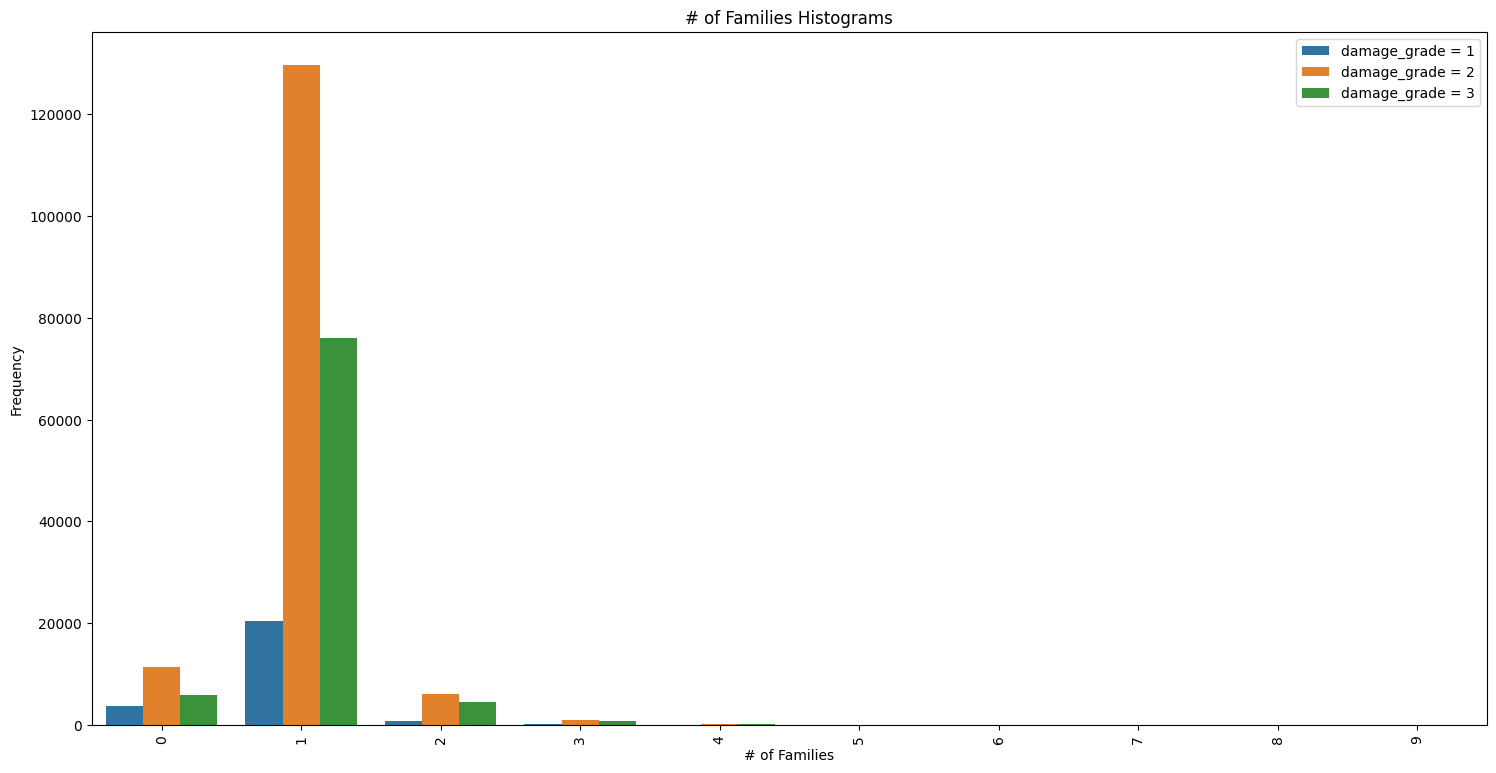

In [82]:
plt.figure(figsize=(18,9))
sns.countplot(x=x["count_families"],hue=y["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("# of Families")
plt.xticks(rotation=90)
plt.title("# of Families Histograms")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

23. Secondary use

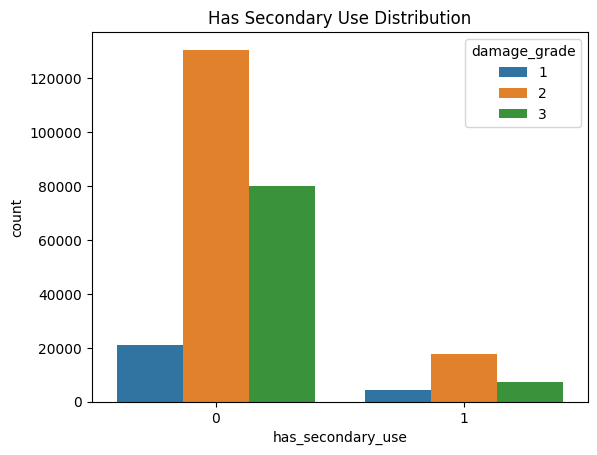

In [83]:
sns.countplot(x = x["has_secondary_use"], hue = y["damage_grade"])
plt.title("Has Secondary Use Distribution")
plt.show()

24. Secondary use: agriculture

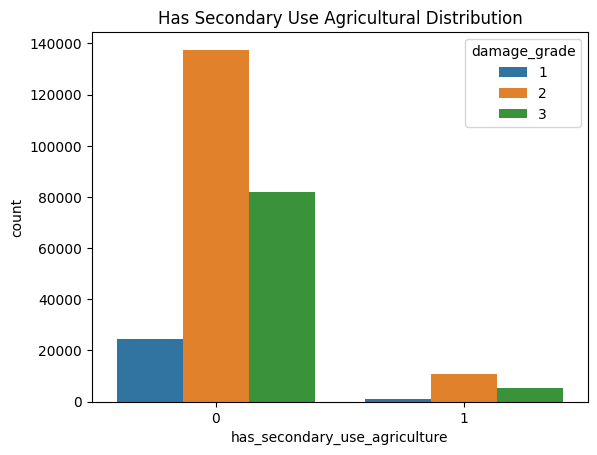

In [84]:
sns.countplot(x = x["has_secondary_use_agriculture"], hue = y["damage_grade"])
plt.title("Has Secondary Use Agricultural Distribution")
plt.show()

25. Secondary use: hotel

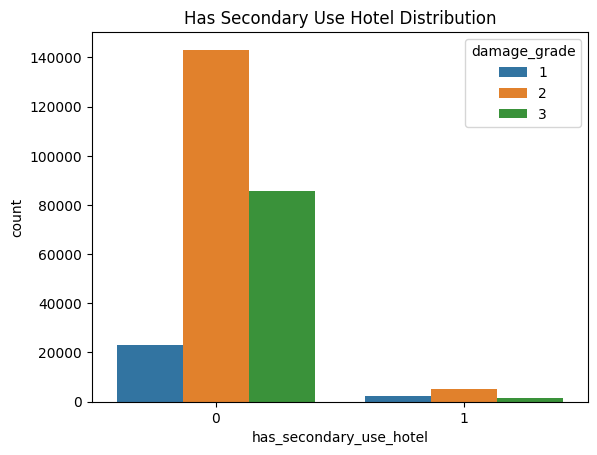

In [85]:
sns.countplot(x = x["has_secondary_use_hotel"], hue = y["damage_grade"])
plt.title("Has Secondary Use Hotel Distribution")
plt.show()

26. Secondary use: rental

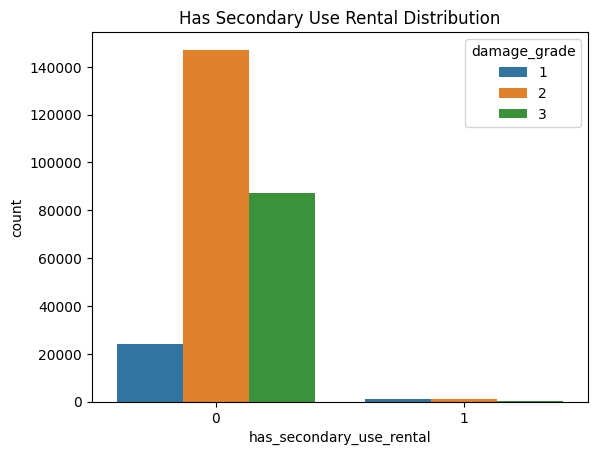

In [86]:
sns.countplot(x = x["has_secondary_use_rental"], hue = y["damage_grade"])
plt.title("Has Secondary Use Rental Distribution")
plt.show()

27. Secondary use: institution

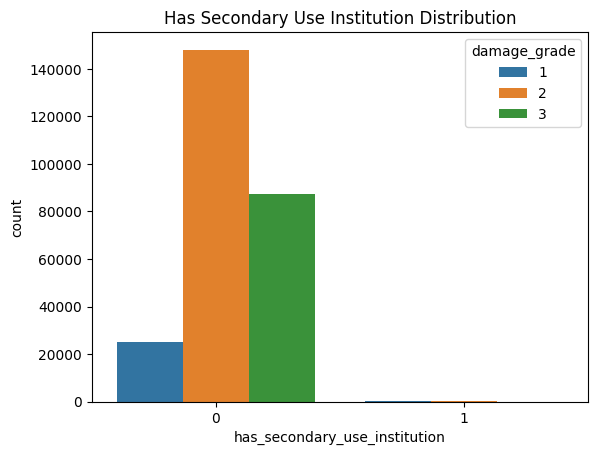

In [87]:
sns.countplot(x = x["has_secondary_use_institution"], hue = y["damage_grade"])
plt.title("Has Secondary Use Institution Distribution")
plt.show()

28. Secndary use: school

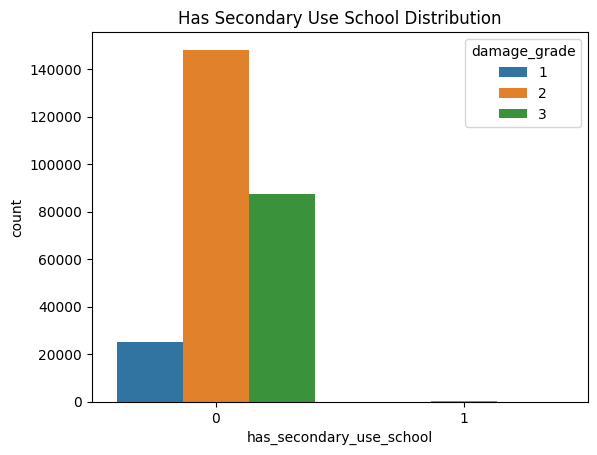

In [88]:
sns.countplot(x = x["has_secondary_use_school"], hue = y["damage_grade"])
plt.title("Has Secondary Use School Distribution")
plt.show()

29. Secondary use: industry

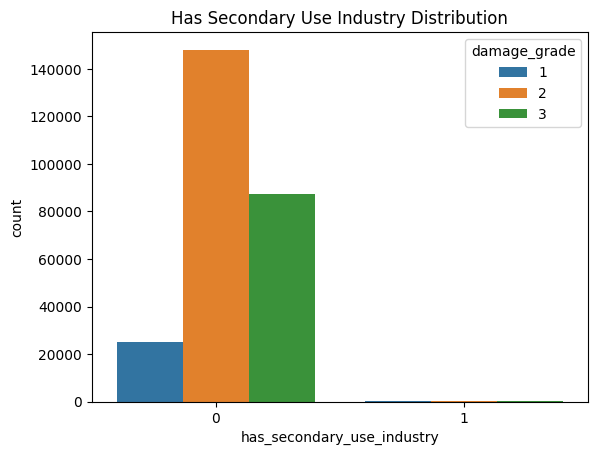

In [89]:
sns.countplot(x = x["has_secondary_use_industry"], hue = y["damage_grade"])
plt.title("Has Secondary Use Industry Distribution")
plt.show()

30. Secondary use: health post

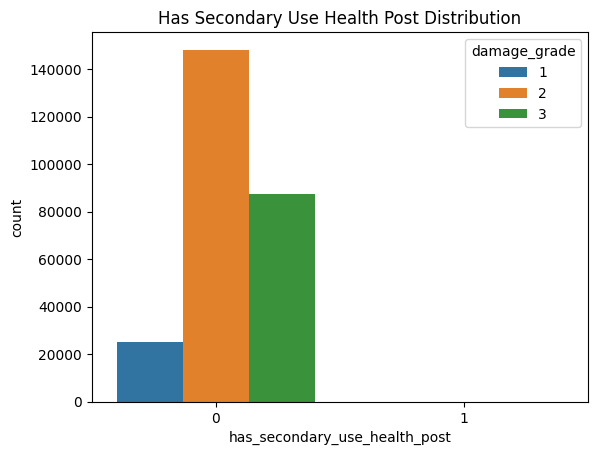

In [90]:
sns.countplot(x = x["has_secondary_use_health_post"], hue = y["damage_grade"])
plt.title("Has Secondary Use Health Post Distribution")
plt.show()

31. Secondary use: government office

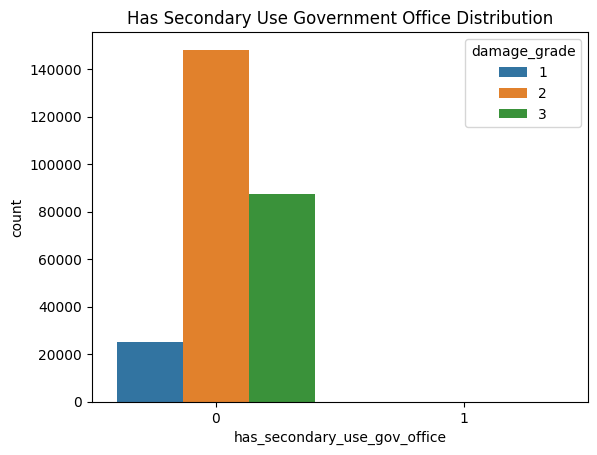

In [91]:
sns.countplot(x = x["has_secondary_use_gov_office"], hue = y["damage_grade"])
plt.title("Has Secondary Use Government Office Distribution")
plt.show()

32. Secondary use: police

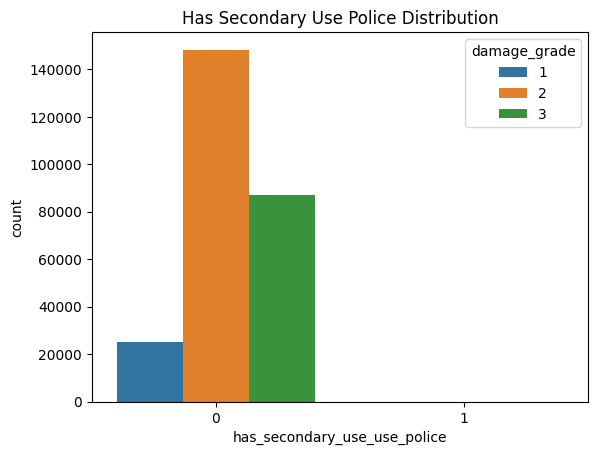

In [92]:
sns.countplot(x = x["has_secondary_use_use_police"], hue = y["damage_grade"])
plt.title("Has Secondary Use Police Distribution")
plt.show()

33. Secondary use: others

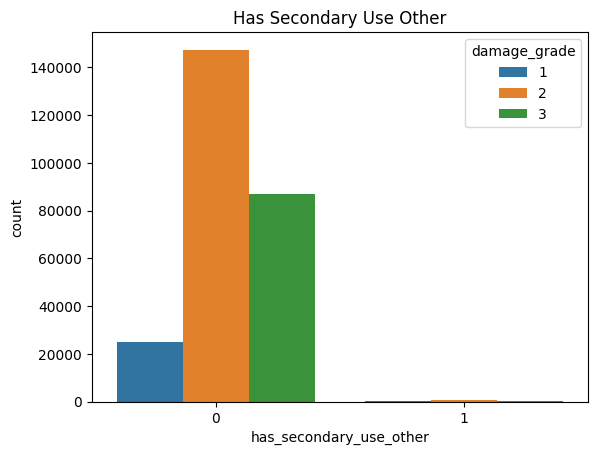

In [93]:
sns.countplot(x = x["has_secondary_use_other"], hue = y["damage_grade"])
plt.title("Has Secondary Use Other")
plt.show()

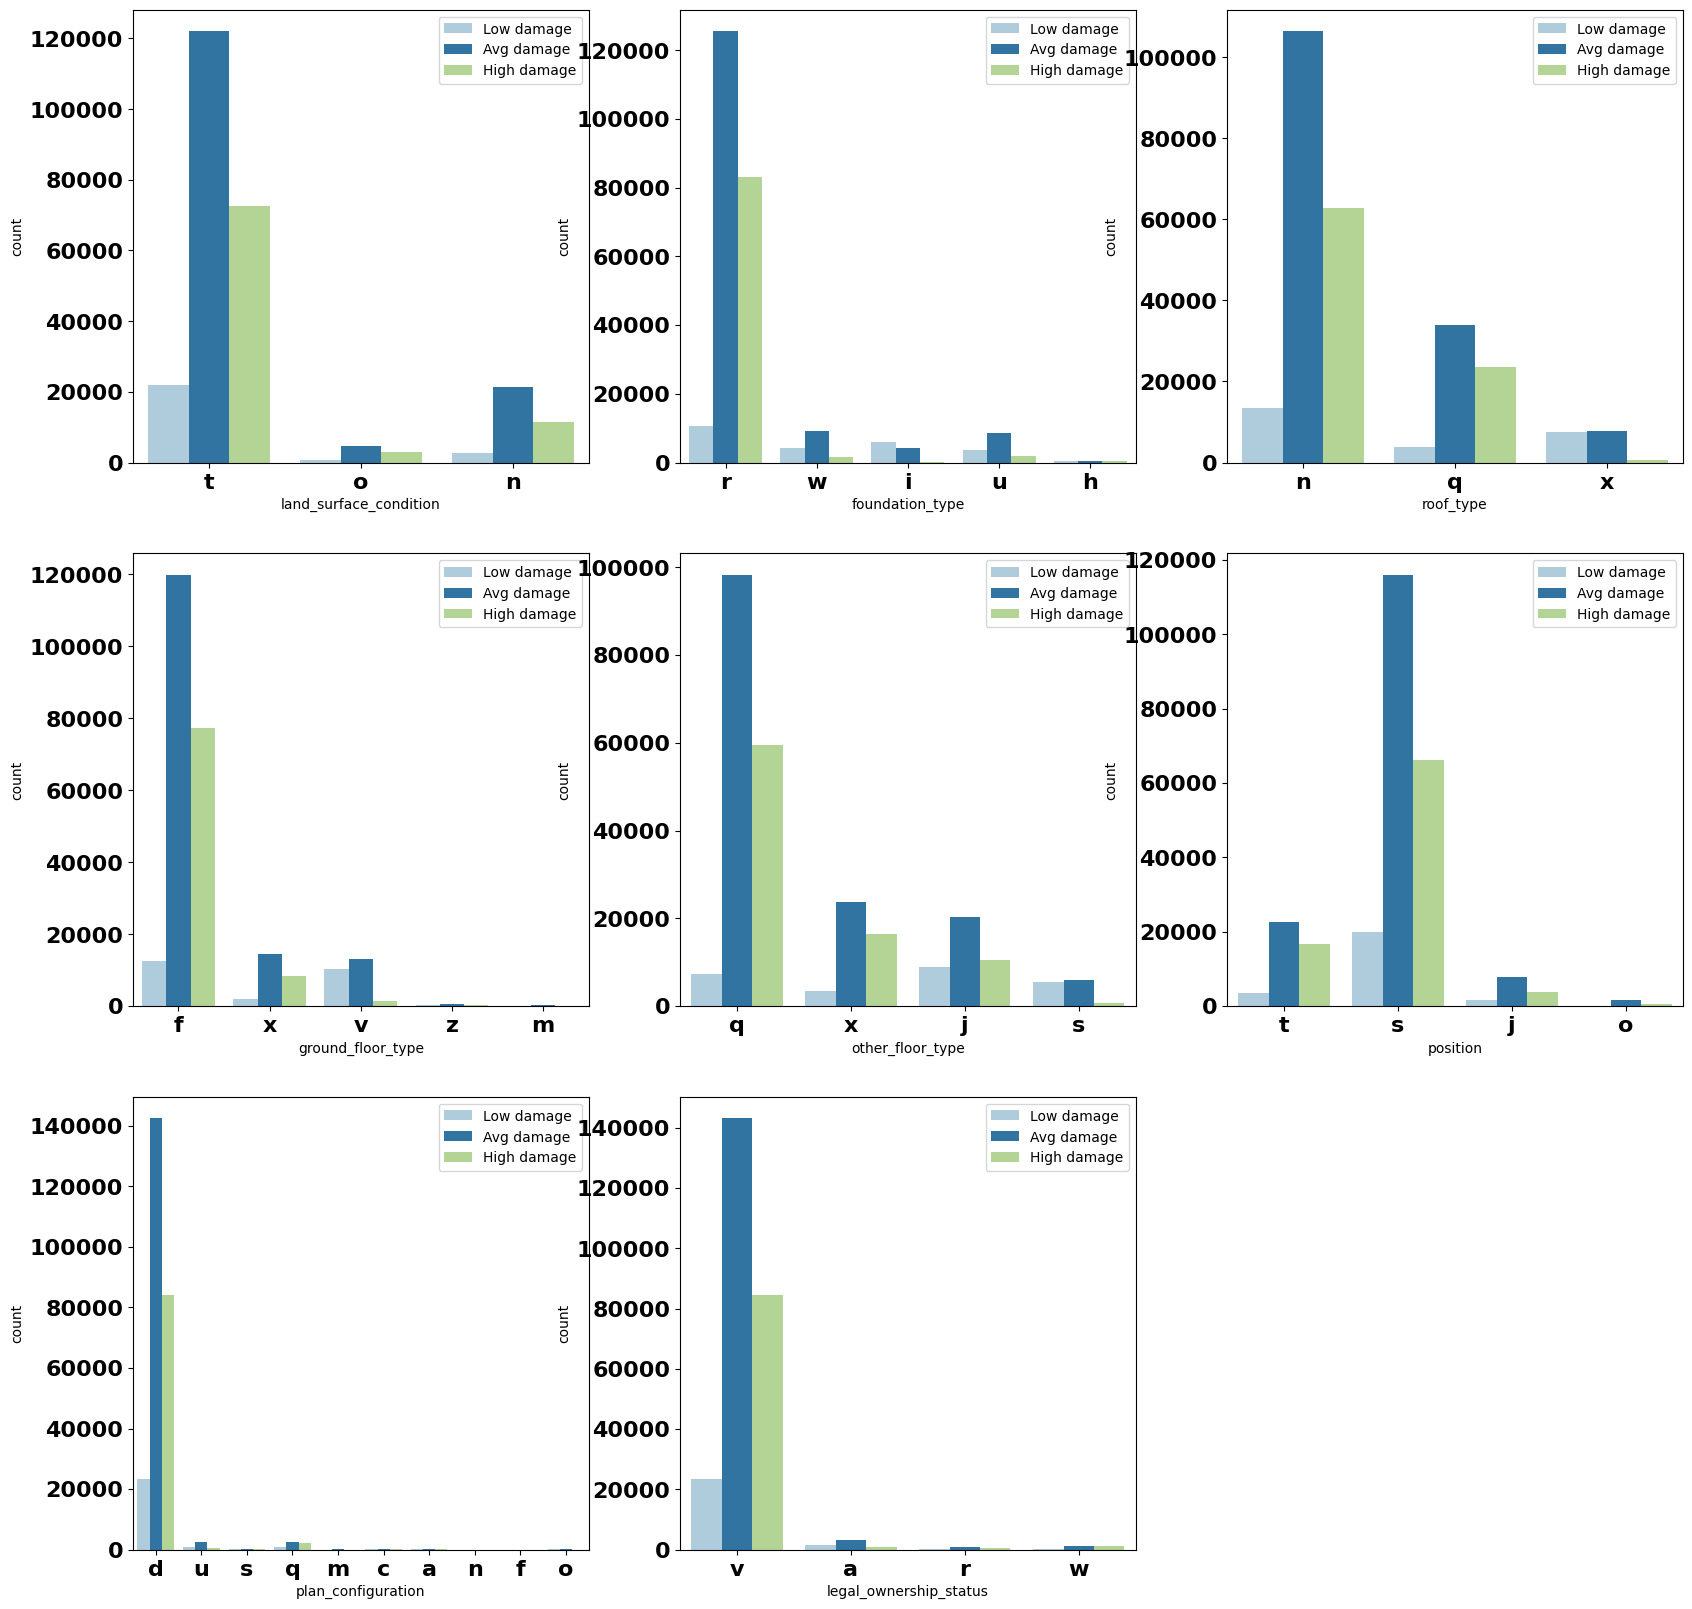

In [103]:
cat_cols=x.select_dtypes(include="object")
font={'weight' : 'bold',
        'size': 16}       
q=1
plt.figure(figsize=(20,20))
for j in cat_cols:
    plt.subplot(3,3,q)
    ax=sns.countplot(x= x[j].dropna(),palette="Paired",hue=y["damage_grade"])
    plt.xticks(**font)
    plt.yticks(**font)
    plt.xlabel(j)
    plt.legend(["Low damage","Avg damage","High damage"])
    q+=1
plt.show()

# **Correlation analysis**

<ipython-input-101-cd8e612caa12>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = x.corrwith(y["damage_grade"])


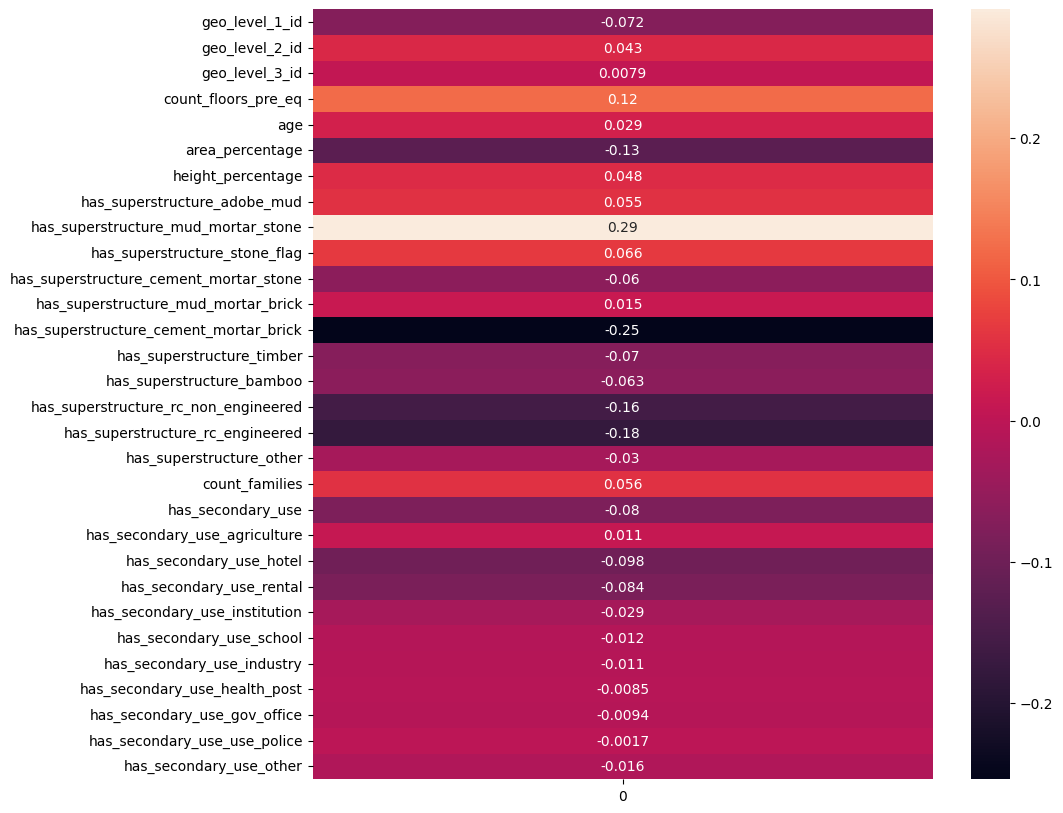

In [101]:
plt.figure(figsize=(10,10))
correlations = x.corrwith(y["damage_grade"])
sns.heatmap(pd.DataFrame(correlations), annot=True)
plt.show()